In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as ur
from astroduet.bbmag import bb_abmag, sigerr
from astroduet.duet_sensitivity import find_limit, compute_snr
from astroduet.duet_telescope import load_telescope_parameters
from astropy.visualization import quantity_support
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [15,10]

In [3]:
# Setup:
td1_band = [180,220]*ur.nm

td2_band = [[260,300],[260,340],[260,400]]*ur.nm
bbtemp = [15000,20000,30000]*ur.K

dist = [100,200]*ur.Mpc

# For the shock model after 1 hr:
swiftmag_sh = -16.5*ur.ABmag

# For the blue kilonova model after 1 hr:
swiftmag_bk = -13.6*ur.ABmag

# Satellite details:
diameter, qe, psf_fwhm, efficiency = load_telescope_parameters(2, diag=True)
outofband_qe = 0.001
exposure = 300*ur.s

Telescope Configuration 2
Entrance Pupil diameter 30.0 cm
Optical Effifiency 0.67
PSF FWHM 9.0 arcsec
Effective Aperture 24.556058315617353 cm
Effective Area 473.5950925286613 cm2


In [4]:
# Calculate magnitudes in different bands for the shock model:
bbmag_sh = np.zeros([len(bbtemp),len(td2_band),len(dist),2])
for i in range(0,len(bbtemp)):
    for j in range(0,len(td2_band)):
        for k in range(0,len(dist)):
            bbmag_sh[i,j,k] = bb_abmag(bbtemp=bbtemp[i], bandone=td1_band, 
                                  bandtwo=td2_band[j], swiftmag=swiftmag_sh, 
                                  dist=dist[k], val=True)

In [5]:
# Same for the blue kilonova:
bbmag_bk = np.zeros([len(bbtemp),len(td2_band),len(dist),2])
for i in range(0,len(bbtemp)):
    for j in range(0,len(td2_band)):
        for k in range(0,len(dist)):
            bbmag_bk[i,j,k] = bb_abmag(bbtemp=bbtemp[i], bandone=td1_band, 
                                  bandtwo=td2_band[j], swiftmag=swiftmag_bk, 
                                  dist=dist[k], val=True)

In [12]:
# Calculate signal-to-noise for each band for the shock model (this is quite slow):
snrs_sh = np.zeros([len(bbtemp),len(td2_band),len(dist),2])
for i in range(0,len(bbtemp)):   
    for k in range(0,len(dist)):
        snrs_sh[i,:,k,0] = compute_snr(td1_band,bbmag_sh[i,0,k,0]*ur.ABmag,
                                  med_zodi=True,diameter=diameter,
                                  exposure = exposure,
                                  efficiency = efficiency, qe = qe,
                                  outofband_qe = outofband_qe, psf_size = psf_fwhm)
        for j in range(0,len(td2_band)):
            snrs_sh[i,j,k,1] = compute_snr(td2_band[j],bbmag_sh[i,j,k,1]*ur.ABmag,
                                  med_zodi=True,diameter=diameter,
                                  exposure = exposure,
                                  efficiency = efficiency, qe = qe,
                                  outofband_qe = outofband_qe, psf_size = psf_fwhm)
        
# Now into magnitude errors:
sigs_sh = 2.5*np.log10(1.+1./snrs_sh)

In [13]:
# And for the blue kilonova:
snrs_bk = np.zeros([len(bbtemp),len(td2_band),len(dist),2])
for i in range(0,len(bbtemp)):   
    for k in range(0,len(dist)):
        snrs_bk[i,:,k,0] = compute_snr(td1_band,bbmag_bk[i,0,k,0]*ur.ABmag,
                                  med_zodi=True,diameter=diameter,
                                  exposure = exposure,
                                  efficiency = efficiency, qe = qe,
                                  outofband_qe = outofband_qe, psf_size = psf_fwhm)
        for j in range(0,len(td2_band)):
            snrs_bk[i,j,k,1] = compute_snr(td2_band[j],bbmag_bk[i,j,k,1]*ur.ABmag,
                                  med_zodi=True,diameter=diameter,
                                  exposure = exposure,
                                  efficiency = efficiency, qe = qe,
                                  outofband_qe = outofband_qe, psf_size = psf_fwhm)
            
# Now into magnitude errors:
sigs_bk = 2.5*np.log10(1.+1./snrs_bk)

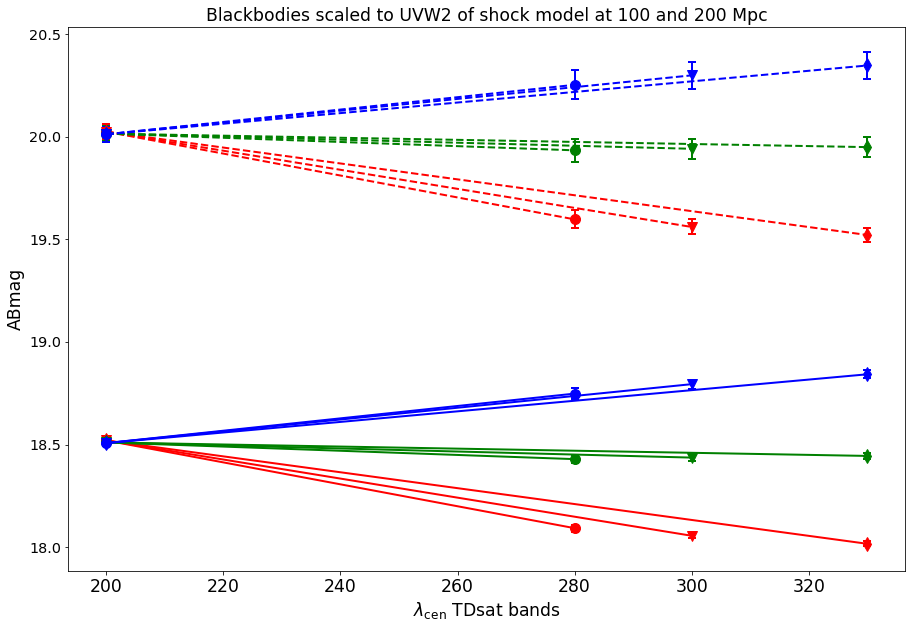

In [16]:
# Plot shock models:
tempcol = ['red', 'green', 'blue']
bandmark = ['o','v','d']
distst = ['-','--']
with quantity_support():
    for i in range(0,len(bbtemp)):
        for j in range(0,len(td2_band)):
            for k in range(0,len(dist)):
                plt.errorbar([np.mean(td1_band),np.mean(td2_band[j])],bbmag_sh[i,j,k],yerr=sigs_sh[i,j,k],
                    marker=bandmark[j],color=tempcol[i],linestyle=distst[k],
                    ms=10,elinewidth=2,capthick=2,capsize=4,linewidth=2,
                    label='BB temperature = '+str(bbtemp[i].value)+'K, TD2 = '+str(td2_band[j,0].value)+'-'+str(td2_band[j,1].value)+' nm')

#plt.legend()
plt.xlabel(r'$\lambda_\mathrm{cen}$ TDsat bands',fontsize='xx-large')
plt.ylabel('ABmag',fontsize='xx-large')
plt.tick_params(axis='y',which='major',labelsize='x-large')
plt.tick_params(axis='x',which='major',labelsize='xx-large')
plt.title('Blackbodies scaled to UVW2 of shock model at 100 and 200 Mpc',fontsize='xx-large')
plt.show()

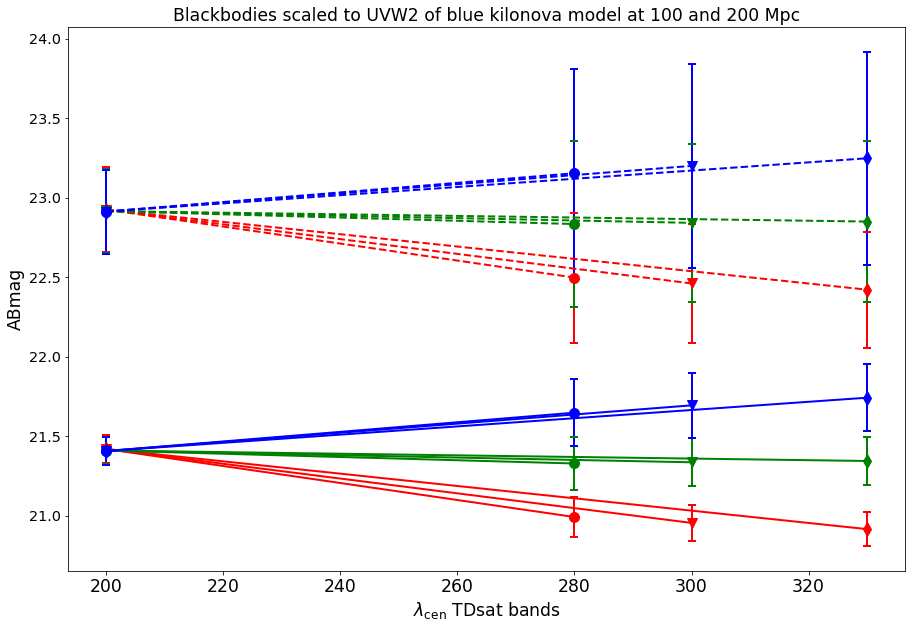

In [15]:
# Plot shock models:
tempcol = ['red', 'green', 'blue']
bandmark = ['o','v','d']
distst = ['-','--']
with quantity_support():
    for i in range(0,len(bbtemp)):
        for j in range(0,len(td2_band)):
            for k in range(0,len(dist)):
                plt.errorbar([np.mean(td1_band),np.mean(td2_band[j])],bbmag_bk[i,j,k],yerr=sigs_bk[i,j,k],
                    marker=bandmark[j],color=tempcol[i],linestyle=distst[k],
                    ms=10,elinewidth=2,capthick=2,capsize=4,linewidth=2,
                    label='BB temperature = '+str(bbtemp[i].value)+'K, TD2 = '+str(td2_band[j,0].value)+'-'+str(td2_band[j,1].value)+' nm')

#plt.legend()
plt.xlabel(r'$\lambda_\mathrm{cen}$ TDsat bands',fontsize='xx-large')
plt.ylabel('ABmag',fontsize='xx-large')
plt.tick_params(axis='y',which='major',labelsize='x-large')
plt.tick_params(axis='x',which='major',labelsize='xx-large')
plt.title('Blackbodies scaled to UVW2 of blue kilonova model at 100 and 200 Mpc',fontsize='xx-large')
plt.show()